In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **VISIUALISATION OF AIRBNB DATASET**

In [6]:
df1_airbnb=pd.read_csv('/content/Airbnb Dataset 19.csv')

In [7]:
df1_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,07-05-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [8]:
len(df1_airbnb)

249

In [9]:
df1_airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
df1_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
df1_airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       7
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
df1_airbnb.drop(['id','last_review'], axis=1, inplace=True)

In [13]:
df1_airbnb.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [14]:
df1_airbnb.fillna({'reviews_per_month':0}, inplace=True)

In [15]:
df1_airbnb.reviews_per_month.isnull().sum()

0

In [16]:
df1_airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [17]:
df1_airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Exploring and Visualizing Data

Exploring host ID values as per unique host ID

In [18]:
host=df1_airbnb.host_id.value_counts().head(10)
print(host)

204539    5
126607    3
256161    3
32294     3
9744      3
22486     3
72062     3
72014     3
190409    2
51038     2
Name: host_id, dtype: int64


In [19]:
host_check=df1_airbnb.calculated_host_listings_count.max()
print(host_check)

6


In [20]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

# hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service

In [21]:
host_df=pd.DataFrame(host)
host_df.reset_index(inplace=True)
host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
print(host_df)

   Host_ID  P_Count
0   204539        5
1   126607        3
2   256161        3
3    32294        3
4     9744        3
5    22486        3
6    72062        3
7    72014        3
8   190409        2
9    51038        2


[Text(0, 0, '9744'),
 Text(1, 0, '22486'),
 Text(2, 0, '32294'),
 Text(3, 0, '51038'),
 Text(4, 0, '72014'),
 Text(5, 0, '72062'),
 Text(6, 0, '126607'),
 Text(7, 0, '190409'),
 Text(8, 0, '204539'),
 Text(9, 0, '256161')]

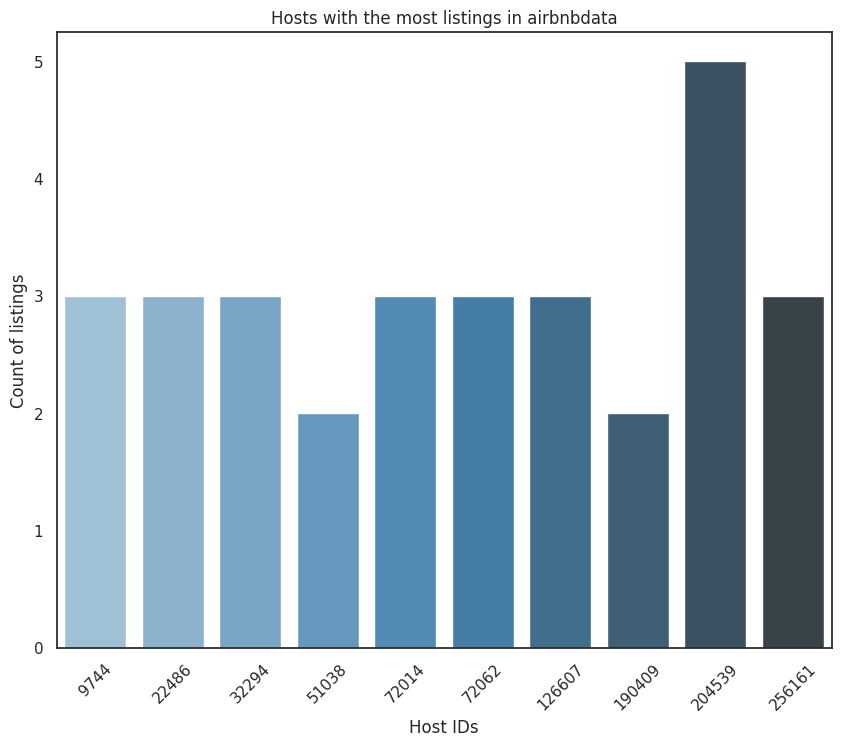

In [22]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in airbnbdata')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [23]:
df1_airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,1.499884e+05,40.730257,-73.964044,143.971888,8.718876,103.445783,1.060964,1.738956,198.538153
std,4.010393e+05,0.049660,0.029685,91.442975,20.398680,100.337887,1.002393,1.234635,126.048056
min,2.787000e+03,40.631880,-74.080880,35.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.014800e+04,40.688430,-73.984980,85.000000,2.000000,21.000000,0.260000,1.000000,75.000000
50%,9.779700e+04,40.721620,-73.964280,125.000000,3.000000,73.000000,0.770000,1.000000,225.000000
75%,1.936370e+05,40.761930,-73.948220,175.000000,5.000000,166.000000,1.650000,2.000000,310.000000
max,6.197784e+06,40.867540,-73.765970,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


In [24]:
df1_airbnb.shape

(249, 14)

plot room type vs price

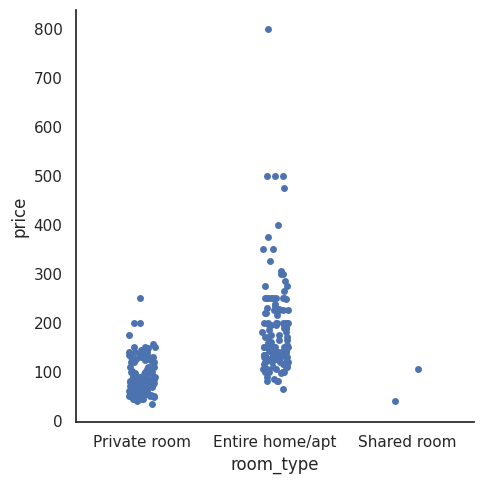

In [25]:
sns.catplot(x="room_type", y="price", data=df1_airbnb);

catplot neighbourhood_group vs price

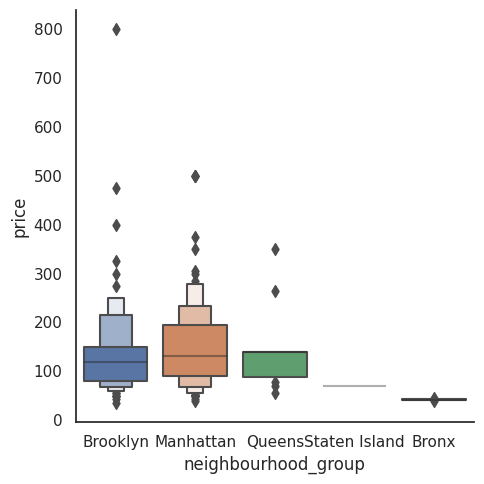

In [26]:
sns.catplot(x="neighbourhood_group", y="price", kind="boxen",
            data=df1_airbnb);

boxplot neighbourhood_group and room availability

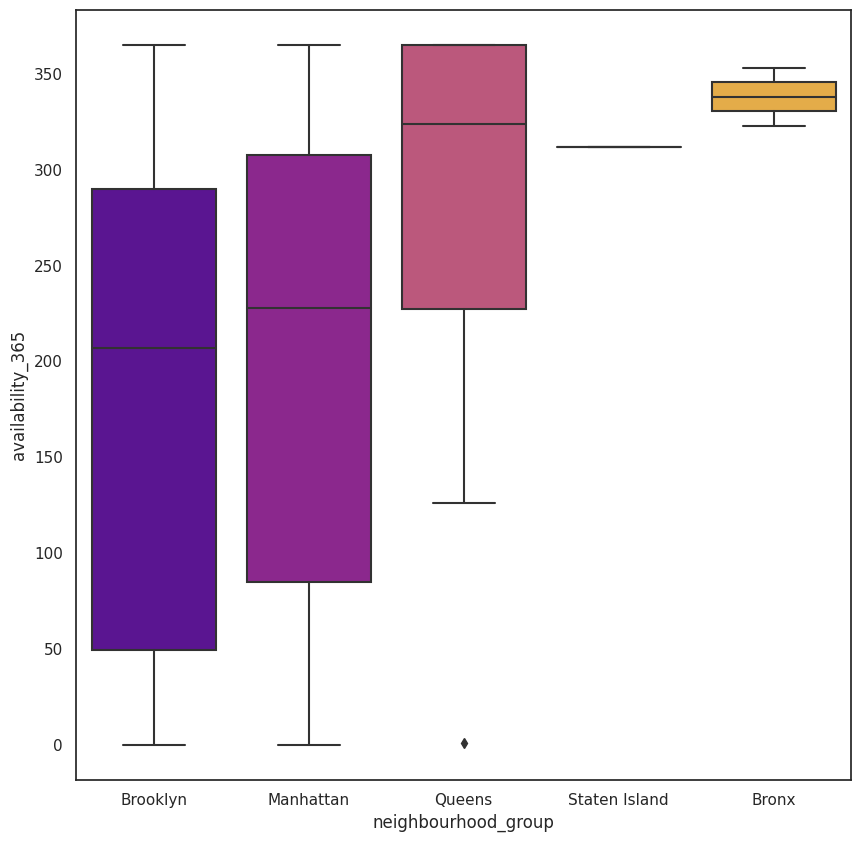

In [27]:
plt.figure(figsize=(10,10))
df1 = sns.boxplot(data=df1_airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

Correlation between different variables

<ipython-input-28-79181d5d4660>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1_airbnb.corr(method='kendall')


Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

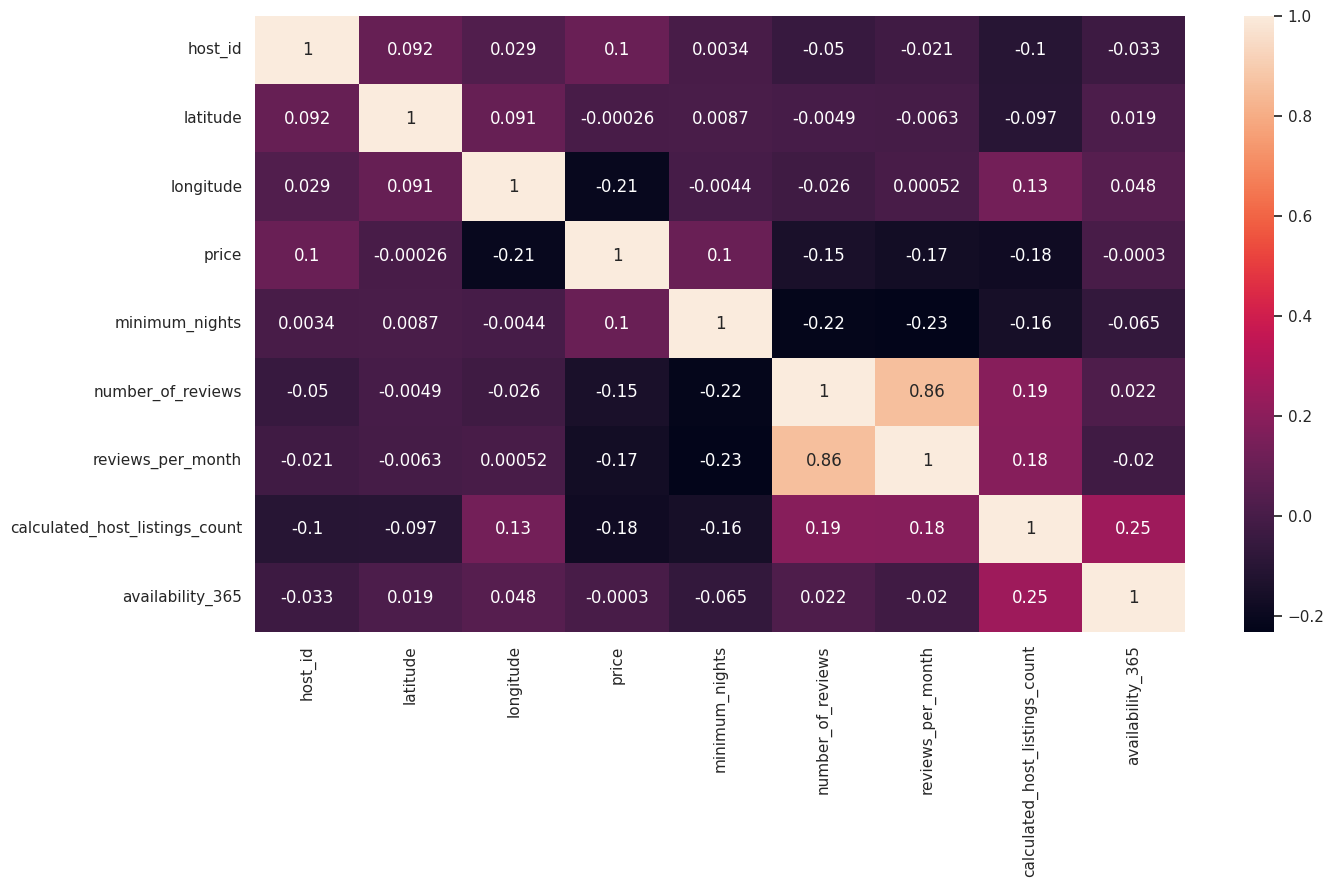

In [28]:
corr = df1_airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df1_airbnb.columns

# **VISUALISATION OF HR DEPARTMENT DATASET**

In [29]:
df2_hrd=pd.read_csv('/content/HRDataset_v14.csv')

In [30]:
df2_hrd.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,Adinolfi Wilson K,10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,Ait Sidi Karthikeyan,10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,Akinkuolie Sarah,10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,AlagbeTrina,10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,Anderson Carol,10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


In [31]:
df2_hrd.shape

(311, 36)

In [32]:
df2_hrd.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [33]:
df2_hrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [34]:
df2_hrd.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [35]:
df2_hrd.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [36]:
#delete the row DateofTermination

del df2_hrd['DateofTermination']

In [37]:
df2_hrd.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     8
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialP

In [38]:
df2_hrd.Department.unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

Droping unnecessary features

In [39]:
df2_hrd.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [40]:
df2_hrd.shape

(311, 35)

In [41]:
dfnew_hrd=df2_hrd.drop(['EmpID','MarriedID','MaritalStatusID','GenderID','EmpStatusID','DeptID','FromDiversityJobFairID','HispanicLatino','DOB','Zip','PositionID','ManagerID','LastPerformanceReview_Date'], axis=1)

In [42]:
dfnew_hrd.shape

(311, 22)

In [43]:
dfnew_hrd.columns

Index(['Employee_Name', 'PerfScoreID', 'Salary', 'Termd', 'Position', 'State',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'DateofHire',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [44]:
dfnew_hrd.head(3)

,Employee_Name,PerfScoreID,Salary,Termd,Position,State,Sex,MaritalDesc,CitizenDesc,RaceDesc,...,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,Adinolfi Wilson K,4,62506,0,Production Technician I,MA,M,Single,US Citizen,White,...,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,0,1
1,Ait Sidi Karthikeyan,3,104437,1,Sr. DBA,MA,M,Married,US Citizen,White,...,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,0,17
2,Akinkuolie Sarah,3,64955,1,Production Technician II,MA,F,Married,US Citizen,White,...,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,0,3


In [45]:
dfnew_hrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee_Name         311 non-null    object 
 1   PerfScoreID           311 non-null    int64  
 2   Salary                311 non-null    int64  
 3   Termd                 311 non-null    int64  
 4   Position              311 non-null    object 
 5   State                 311 non-null    object 
 6   Sex                   311 non-null    object 
 7   MaritalDesc           311 non-null    object 
 8   CitizenDesc           311 non-null    object 
 9   RaceDesc              311 non-null    object 
 10  DateofHire            311 non-null    object 
 11  TermReason            311 non-null    object 
 12  EmploymentStatus      311 non-null    object 
 13  Department            311 non-null    object 
 14  ManagerName           311 non-null    object 
 15  RecruitmentSource     3

In [46]:
dfnew_hrd.DateofHire 

0      07-05-2011
1       3/30/2015
2      07-05-2011
3      01-07-2008
4      07-11-2011
          ...    
306    07-07-2014
307    09-02-2008
308    04-10-2010
309     3/30/2015
310     9/29/2014
Name: DateofHire, Length: 311, dtype: object

In [47]:
dfnew_hrd['DateofHire'] = pd.to_datetime(dfnew_hrd.DateofHire)

In [48]:
department=dfnew_hrd.Department.unique()

In [49]:
department=dfnew_hrd.Department.replace("Production       ", "Production",inplace=True)

In [50]:
dfnew_hrd.Department.unique()

array(['Production', 'IT/IS', 'Software Engineering', 'Admin Offices',
       'Sales', 'Executive Office'], dtype=object)

In [51]:
dfnew_hrd.Position.unique()


array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'Data Analyst ', 'CIO'], dtype=object)

In [52]:
dfnew_hrd.Position.replace("Data Analyst ", "Data Analyst",inplace=True)
dfnew_hrd.Position.unique()


array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'CIO'], dtype=object)

In [53]:
employees_count = dfnew_hrd.groupby('Department').Employee_Name.count()


In [54]:
employees_count

Department
Admin Offices             9
Executive Office          1
IT/IS                    50
Production              209
Sales                    31
Software Engineering     11
Name: Employee_Name, dtype: int64

In [57]:
recruitment = dfnew_hrd.RecruitmentSource.unique()
recruitment

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

Different recruitment sources

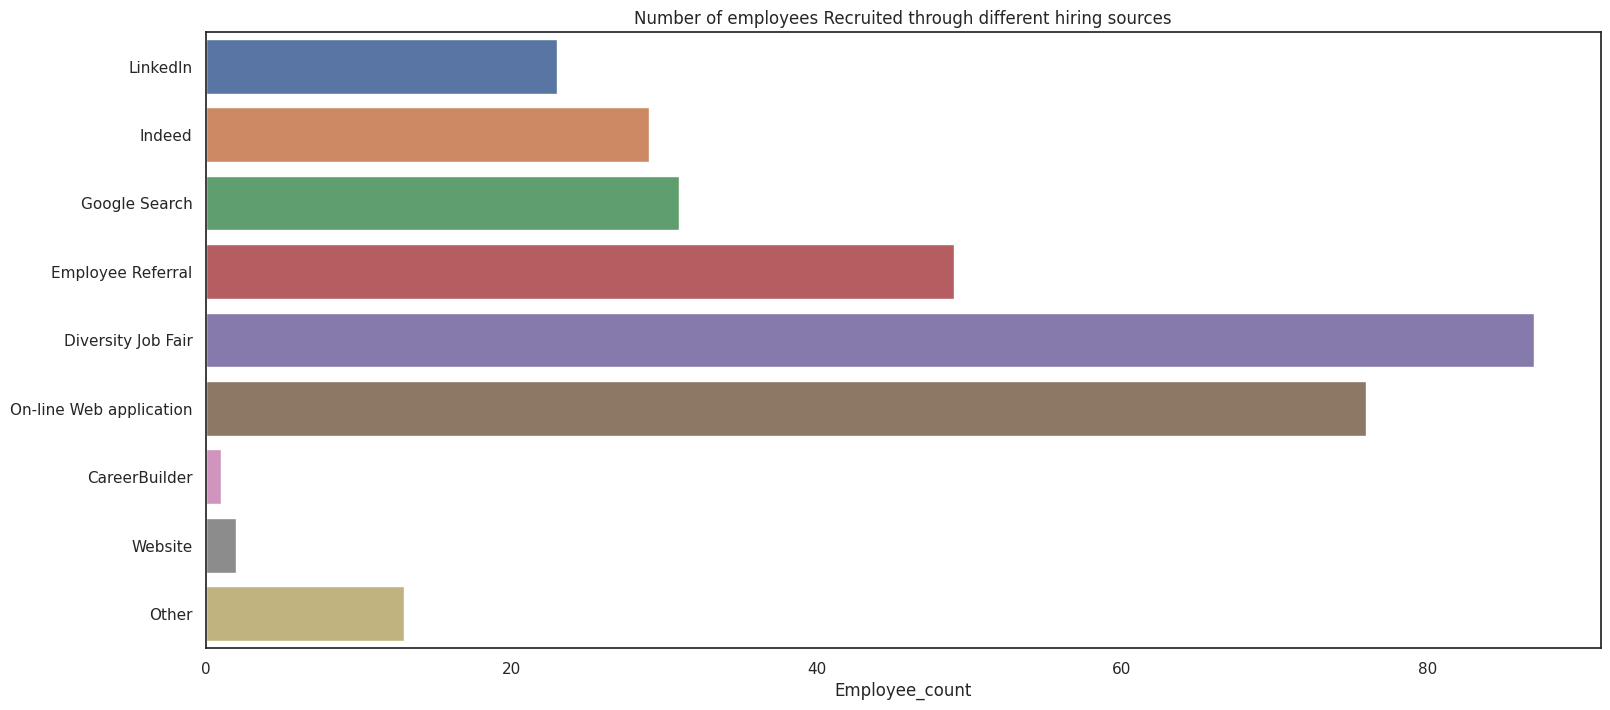

In [58]:
employees_count = dfnew_hrd.groupby('RecruitmentSource').Employee_Name.count()
plt.figure(figsize=(18,8))
sns.barplot(x=employees_count,y=recruitment)
plt.xlabel('Employee_count')
plt.title('Number of employees Recruited through different hiring sources');

Average Salary of employee

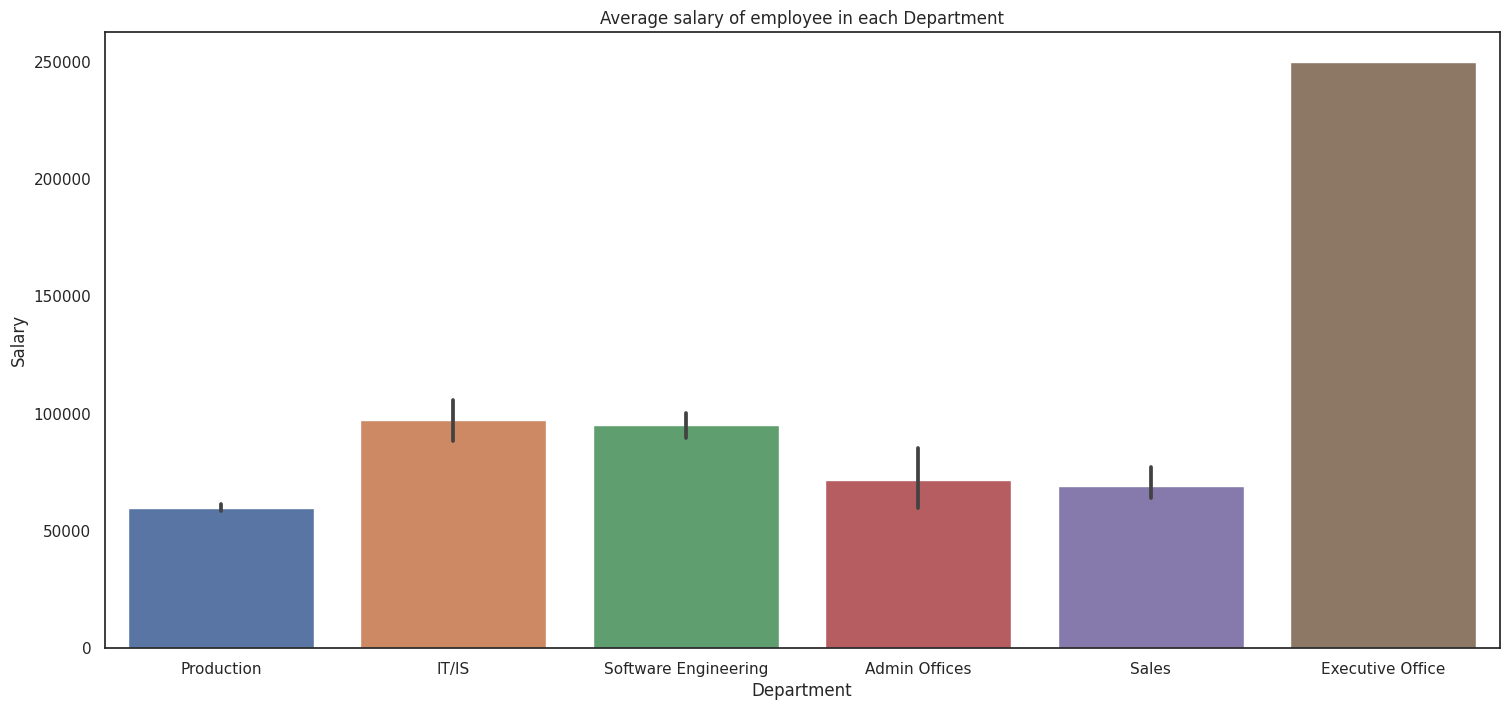

In [59]:
plt.figure(figsize=(18,8))
sns.barplot(x='Department', y='Salary', data=dfnew_hrd)
plt.title('Average salary of employee in each Department');

Which employee performs well according to martial status

<Axes: xlabel='PerfScoreID', ylabel='MaritalDesc'>

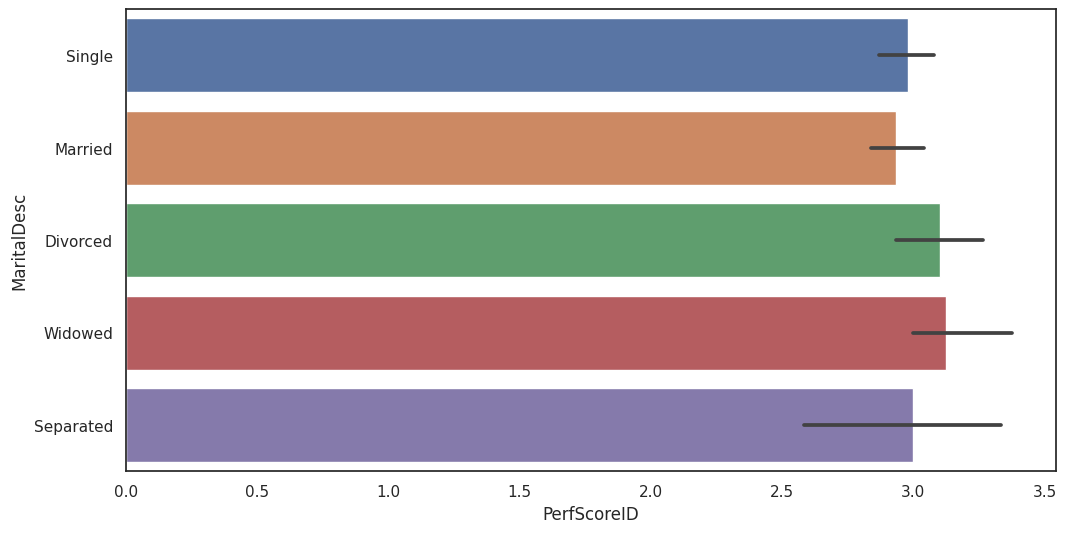

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(x=dfnew_hrd.PerfScoreID,y=dfnew_hrd.MaritalDesc, data=dfnew_hrd)

Which Department has the highest Employee Satisfaction

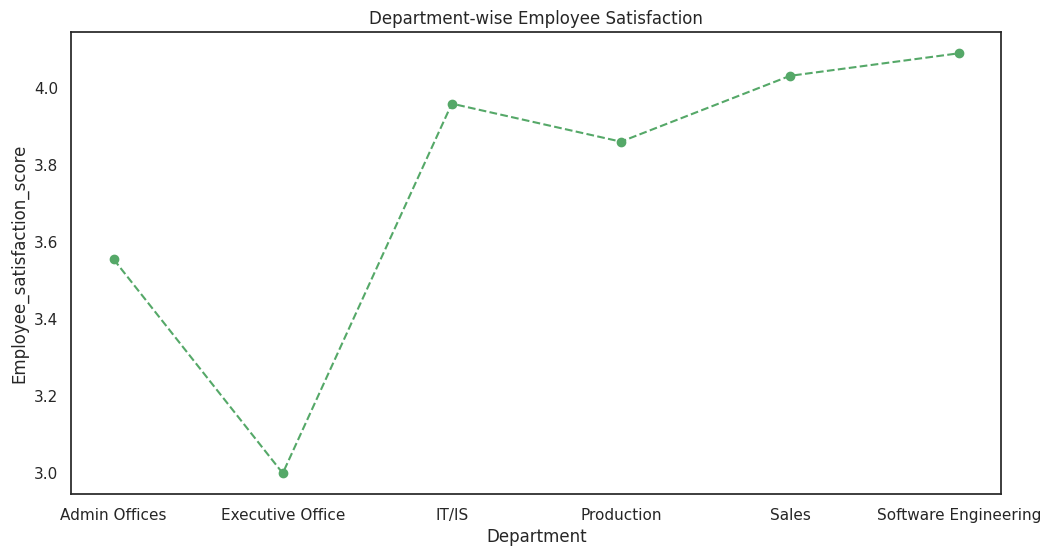

In [63]:
emp_sat = dfnew_hrd.groupby('Department').EmpSatisfaction.mean()
plt.figure(figsize=(12,6))
plt.plot(emp_sat, 'o--g')
plt.ylabel('Employee_satisfaction_score')
plt.xlabel('Department')
plt.title('Department-wise Employee Satisfaction');

Are Female employees getting paid same as the Male employees

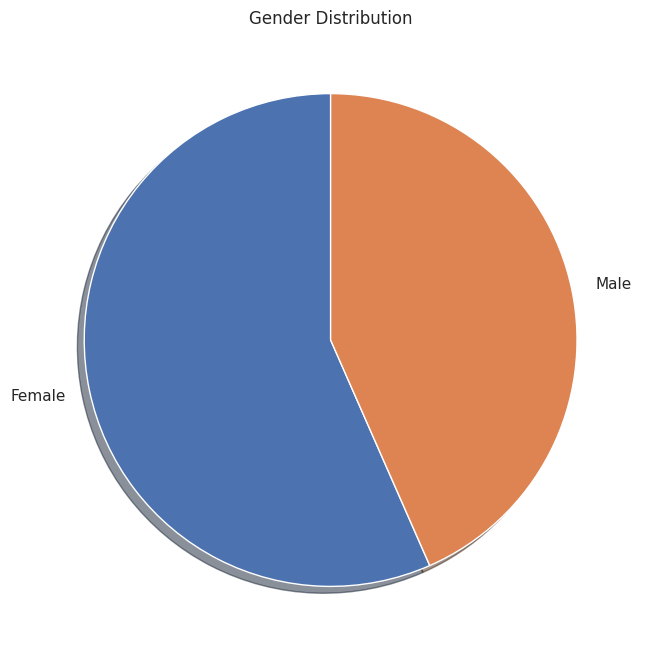

In [64]:
dfnew_hrd.groupby('Sex').Employee_Name.count()
gender = ["Female", "Male"]
plt.pie(dfnew_hrd.groupby('Sex').Employee_Name.count(), labels = gender, startangle = 90, shadow = True)
plt.title('Gender Distribution');